# Stock Price Predictor 
**Life cycle of Machine Learning Project**

- Understanding the Problem Statement
- Setup & Imports
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem Statement

## 2) Setup & Imports

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


## 3) Data Collection 
1. Downlaod the data and save it into data folder.

In [20]:
TICKER = "GOOGL"
START_DATE = "2020-01-01"
END_DATE = "2026-01-01"
DATA_FOLDER = "../data/"
    
# Define the path to save the data    
data_path = os.path.join(DATA_FOLDER, "stock_data.csv")

# Download stock data
print(f"Downloading data for {TICKER} from {START_DATE} to {END_DATE}...")
df = yf.download(TICKER, start=START_DATE, end=END_DATE)

# Reset the index make data a normal column not an index
df.reset_index(inplace = True)

# Flatten colums fix for new yfinance version
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
    
# Save the data to a CSV file
os.makedirs(DATA_FOLDER, exist_ok=True)
df.to_csv(data_path, index=False)

print(f"Data downloaded and saved to {data_path}.")



[*********************100%***********************]  1 of 1 completed

Data downloaded and saved to ../data/stock_data.csv.


2. Shape of the Dataset

In [5]:
df.shape

(1508, 6)

## 4) Data Check
- Check Top 5 Records
- Check data type
- Check Missing values
- Check Duplicates
- Check statistics of data set
- Check & Fix Sorting

1) print the top 5 records

In [6]:
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,67.920815,67.920815,66.819638,66.914918,27278000
1,2020-01-03,67.565491,68.172409,66.860816,66.894565,23408000
2,2020-01-06,69.366394,69.391700,67.043446,67.074704,46768000
3,2020-01-07,69.232399,69.648755,69.056232,69.497895,34330000
4,2020-01-08,69.725182,70.063128,69.109336,69.218012,35314000


2) Check Data Types

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   Date    1508 non-null   datetime64[s]
 1   Close   1508 non-null   float64      
 2   High    1508 non-null   float64      
 3   Low     1508 non-null   float64      
 4   Open    1508 non-null   float64      
 5   Volume  1508 non-null   int64        
dtypes: datetime64[s](1), float64(4), int64(1)
memory usage: 70.8 KB


Data type of date column is already datetime we don't need to change it.

3) Check Missing values

In [10]:
df.isnull().sum()

Price
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

There is no missing values in the data set

4) Check Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

There is no duplicates values in the data set

5) Check statistics of data set
categorical column

In [14]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
count,1508,1508.000000,1508.000000,1508.000000,1508.000000,1.508000e+03
mean,2022-12-30 16:01:35,133.525272,135.013478,131.958143,133.447602,3.361401e+07
min,2020-01-02 00:00:00,52.311249,52.945457,50.065219,52.422408,9.312000e+06
25%,2021-06-30 18:00:00,99.220314,100.371625,97.498329,98.833242,2.406798e+07
50%,2022-12-28 12:00:00,129.273254,131.081330,128.012780,129.766017,2.997065e+07
75%,2024-07-01 06:00:00,160.374569,162.424494,158.240508,160.279097,3.824400e+07
max,2025-12-31 00:00:00,323.228577,328.615037,318.961364,325.996755,1.274901e+08
std,NaN,49.854433,50.370566,49.307021,49.873554,1.488976e+07


6) Check & Fix Sorting

In [18]:
df = df.sort_values(by="Date")
"Data is sorted by date."

'Data is sorted by date.'

## 5) Exploratory Data Analysis (EDA) 

1) Visualizing the price Trend

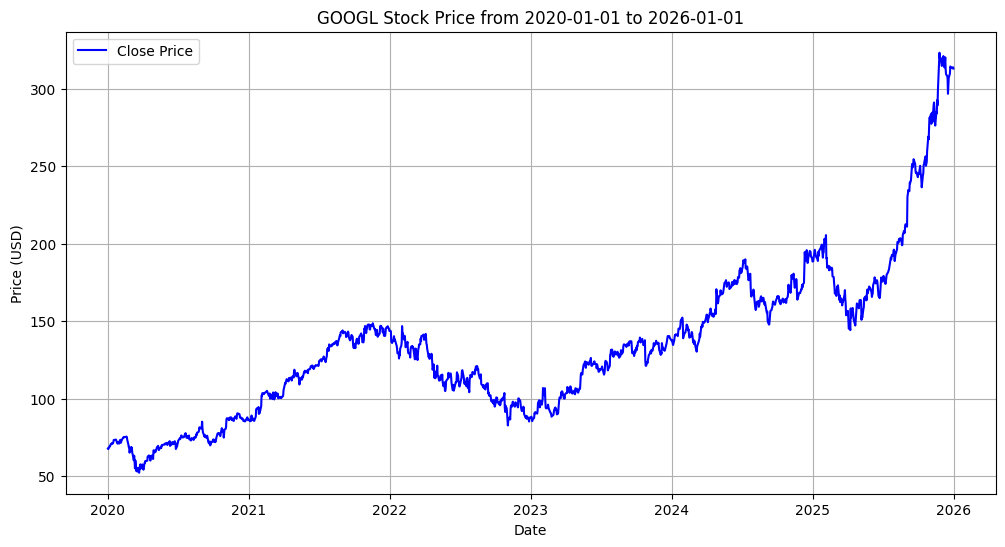

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price", color = "blue" )
plt.title(f"{TICKER} Stock Price from {START_DATE} to {END_DATE}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

2) Feature Engineering (Making the Data Smart)   

Raw prices (Open, High, Low, Close) are not enough. We need to give the model "Hints" about the trend.

We will create 3 specific hints in the Notebook:
- SMA_10 (Short Term Trend): Average price of the last 10 days.
- SMA_50 (Long Term Trend): Average price of the last 50 days.
- Volatility (Risk): How much the price is shaking up and down.

In [24]:
# Create moving averages
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Create Volatility (Risk) feature
df['Volatility'] = df['Close'].rolling(window=10).std()

# Create Target variable: Next day price movement
df['Target'] = df['Close'].shift(-1)

# Drop rows with NaN values created by rolling calculations
print("Rows before cleaning :", len(df))
df.dropna(inplace=True)
print("Rows after cleaning  :", len(df))

# show the new columns
df[['Date', 'Close', 'SMA_10', 'SMA_50', 'Volatility', 'Target']].tail()


Rows before cleaning : 1508
Rows after cleaning  : 1458


Price,Date,Close,SMA_10,SMA_50,Volatility,Target
1502,2025-12-23,314.350006,308.719000,290.253782,6.406795,314.089996
1503,2025-12-24,314.089996,308.107001,291.629791,5.400437,313.510010
1504,2025-12-26,313.510010,308.215002,292.882673,5.506259,313.559998
1505,2025-12-29,313.559998,308.642001,294.127961,5.758666,313.850006
1506,2025-12-30,313.850006,309.205002,295.342272,5.983641,313.000000


3) Visualize after feature engineering.

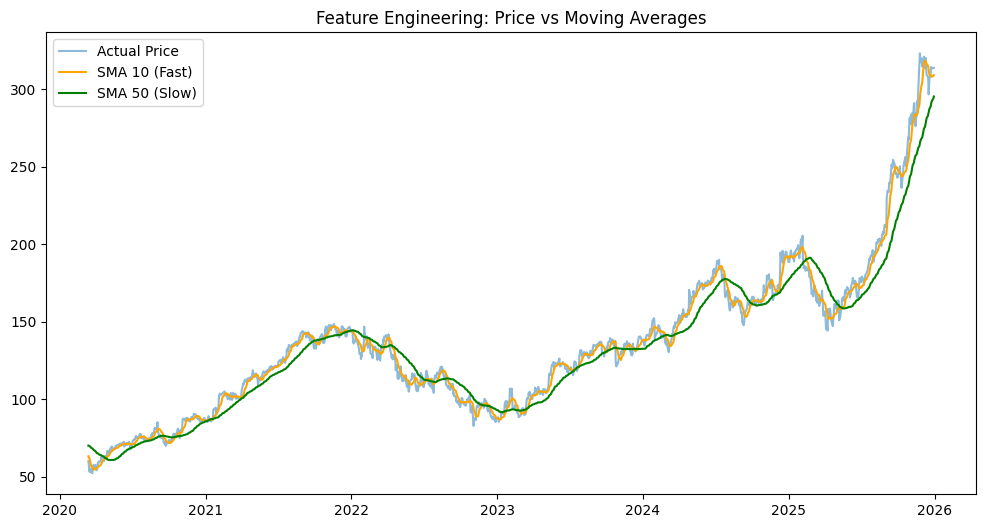

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price', alpha=0.5)
plt.plot(df['Date'], df['SMA_10'], label='SMA 10 (Fast)', color='orange')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50 (Slow)', color='green')
plt.title("Feature Engineering: Price vs Moving Averages")
plt.legend()
plt.show()

4) Correlation Matrix
Check which features is important.

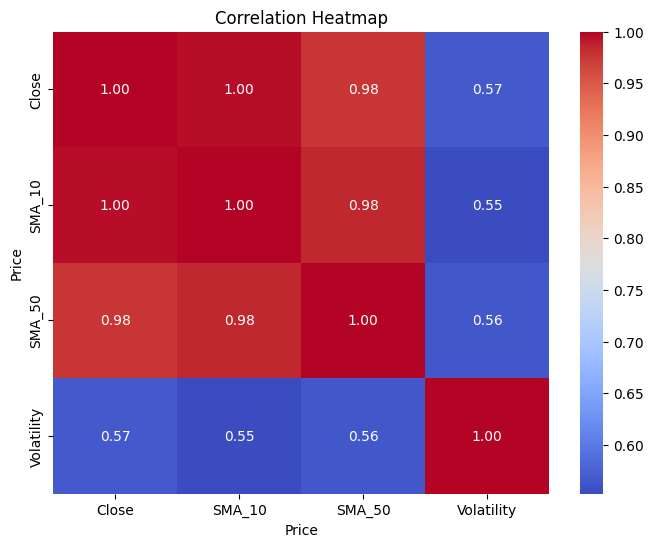

In [27]:
# Select only numeric columns for correlation
numeric_df = df[['Close', 'SMA_10', 'SMA_50', 'Volatility']]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()